# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.5]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V). Here for this set take <b>20K</b> datapoints only. </li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V). Here for this set take <b>20K</b> datapoints only. </li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using simple cross validation data</li>
    <li>You can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

In [2]:
data=pd.read_csv("preprocessed_data_title.csv")
data.head()

Unnamed: 0  Unnamed: 0.1 school_state teacher_prefix  \
0           0             0           ca            mrs   
1           1             1           ut             ms   
2           2             2           ca            mrs   
3           3             3           ga            mrs   
4           4             4           wa            mrs   

  project_grade_category  teacher_number_of_previously_posted_projects  \
0          grades_prek_2                                            53   
1             grades_3_5                                             4   
2          grades_prek_2                                            10   
3          grades_prek_2                                             2   
4             grades_3_5                                             2   

   project_is_approved   clean_categories                 clean_subcategories  \
0                    1       math_science  appliedsciences health_lifescience   
1                    1       specialneeds                        specialneeds   
2                    1  literacy_language                            literacy   
3                    1    appliedlearning                    earlydevelopment   
4                    1  literacy_language                            literacy   

                                               essay   price  \
0  i fortunate enough use fairy tale stem kits cl...  725.05   
1  imagine 8 9 years old you third grade classroo...  213.03   
2  having class 24 students comes diverse learner...  329.00   
3  i recently read article giving students choice...  481.04   
4  my students crave challenge eat obstacles brea...   17.74   

                                     project_title  
0        educational support english learners home  
1                 wanted projector hungry learners  
2  soccer equipment awesome middle school students  
3                           techie kindergarteners  
4                           interactive math tools

In [3]:
y = data["project_is_approved"].values
X = data.drop(['project_is_approved'],axis=1)

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, stratify=y)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [5]:
X_train.head()

Unnamed: 0  Unnamed: 0.1 school_state teacher_prefix  \
91283       91283         91283           az             ms   
2768         2768          2768           or            mrs   
97956       97956         97956           ca             ms   
6768         6768          6768           ga            mrs   
71472       71472         71472           il             ms   

      project_grade_category  teacher_number_of_previously_posted_projects  \
91283             grades_3_5                                            18   
2768              grades_3_5                                             7   
97956             grades_3_5                                             1   
6768              grades_3_5                                             0   
71472          grades_prek_2                                             5   

                     clean_categories             clean_subcategories  \
91283  literacy_language math_science  literature_writing mathematics   
2768                     math_science                     mathematics   
97956      health_sports specialneeds    health_wellness specialneeds   
6768       health_sports specialneeds    health_wellness specialneeds   
71472               literacy_language     literacy literature_writing   

                                                   essay   price  \
91283  my students amazing the school title 1 school ...   56.03   
2768   without mathematics nothing everything around ...  284.19   
97956  my students readers scientists mathematicians ...   82.86   
6768   all children unique imagine child taught sit l...  444.87   
71472  this year i made decision move second grade fi...  379.73   

                                 project_title  
91283                 kinder farm kinder table  
2768                       tables make us able  
97956            advancing learning technology  
6768                           supplies needed  
71472  getting tech ipad 21st century learning

In [6]:
X_train = X_train.reset_index(drop=True)

In [7]:
X_train.head()

Unnamed: 0  Unnamed: 0.1 school_state teacher_prefix  \
0       91283         91283           az             ms   
1        2768          2768           or            mrs   
2       97956         97956           ca             ms   
3        6768          6768           ga            mrs   
4       71472         71472           il             ms   

  project_grade_category  teacher_number_of_previously_posted_projects  \
0             grades_3_5                                            18   
1             grades_3_5                                             7   
2             grades_3_5                                             1   
3             grades_3_5                                             0   
4          grades_prek_2                                             5   

                 clean_categories             clean_subcategories  \
0  literacy_language math_science  literature_writing mathematics   
1                    math_science                     mathematics   
2      health_sports specialneeds    health_wellness specialneeds   
3      health_sports specialneeds    health_wellness specialneeds   
4               literacy_language     literacy literature_writing   

                                               essay   price  \
0  my students amazing the school title 1 school ...   56.03   
1  without mathematics nothing everything around ...  284.19   
2  my students readers scientists mathematicians ...   82.86   
3  all children unique imagine child taught sit l...  444.87   
4  this year i made decision move second grade fi...  379.73   

                             project_title  
0                 kinder farm kinder table  
1                      tables make us able  
2            advancing learning technology  
3                          supplies needed  
4  getting tech ipad 21st century learning

In [8]:
def response_encoding(cat_feature):
    pos_dic = {} 
    neg_dic = {}
    final_list = []
    cat_types_list =[]
    total_counts = dict(X_train[cat_feature].value_counts())
    for row in range(len(X_train[cat_feature])):
        if (X_train.loc[row,cat_feature] and y_train[row]==0):  #school_state and its project_approved status= 0
            k = str(X_train.loc[row,cat_feature])
            if k in neg_dic.keys():
                neg_dic[k]+=1
            else:
                neg_dic.update({k:1})
        else:
            k = str(X_train.loc[row,cat_feature])
            if k in pos_dic.keys():
                pos_dic[k]+=1
            else:
                pos_dic.update({k:1})

    for categ_type in X_train[cat_feature]:
      try:
        neg_class_count = neg_dic[str(categ_type)]
      except KeyError:
        neg_class_count = 0
      try:
        pos_class_count = pos_dic[str(categ_type)]
      except KeyError:
        pos_class_count = 0
      #pos_class_count = total_counts[str(categ_type)]-neg_class_count ##positive_points = total_count - neg-points of that category.
      neg_prob_score = neg_class_count/total_counts[str(categ_type)]
      pos_prob_score = pos_class_count/total_counts[str(categ_type)]
      final_list.append([neg_prob_score,pos_prob_score ])
      cat_types_list.append(categ_type)
    df = pd.DataFrame(final_list,columns=[cat_feature+"_0",cat_feature+"_1"])
    df['cat_type'] = cat_types_list
    return df,pos_dic,neg_dic

In [9]:
def test_response_encoding(cat_feature):
    test_final_list = []
    for i in tqdm(X_test[cat_feature].values):
        if i in neg_dic.keys():            ## if it is present in train data then we will use its scores
            neg_score = list(df[df['cat_type']==str(i)][cat_feature+"_0"])[0]
            pos_score = list(df[df['cat_type']==str(i)][cat_feature+"_1"])[0]
            test_final_list.append([neg_score,pos_score])
        elif i in pos_dic.keys():
            neg_score = list(df[df['cat_type']==str(i)][cat_feature+"_0"])[0]
            pos_score = list(df[df['cat_type']==str(i)][cat_feature+"_1"])[0]
            test_final_list.append([neg_score,pos_score])
        else:                       # if it is not present in train data but present in test data then we will assign scores [0.5,0.5]
            neg_score = 0.5
            pos_score = 0.5
            test_final_list.append([neg_score,pos_score])
    df1 = pd.DataFrame(test_final_list,columns=[cat_feature+"_0",cat_feature+"_1"])
    return df1

In [19]:
df,pos_dic,neg_dic = response_encoding('school_state')   #In df i created cat_type col for comparing the test_data with train data. 

In [11]:
x_test_state_resp = test_response_encoding('school_state')

100%|████████████████████████████████████████████████████████████████████████████| 32775/32775 [08:45<00:00, 62.42it/s]


In [20]:
df

school_state_0  school_state_1 cat_type
0            0.153270        0.846730       az
1            0.153757        0.846243       or
2            0.141754        0.858246       ca
3            0.158345        0.841655       ga
4            0.144289        0.855711       il
...               ...             ...      ...
76468        0.141754        0.858246       ca
76469        0.141754        0.858246       ca
76470        0.141754        0.858246       ca
76471        0.141754        0.858246       ca
76472        0.142163        0.857837       mn

[76473 rows x 3 columns]

In [12]:
x_train_state_resp = df.drop(["cat_type"],axis=1)

In [17]:
X_test.head()

Unnamed: 0  Unnamed: 0.1 school_state teacher_prefix  \
62486       62486         62486           il            mrs   
19301       19301         19301           co             ms   
69154       69154         69154           ny             mr   
20762       20762         20762           ok             ms   
74786       74786         74786           de            mrs   

      project_grade_category  teacher_number_of_previously_posted_projects  \
62486             grades_3_5                                             2   
19301          grades_prek_2                                             0   
69154          grades_prek_2                                             0   
20762            grades_9_12                                             1   
74786          grades_prek_2                                            40   

                     clean_categories                 clean_subcategories  \
62486  literacy_language specialneeds               literacy specialneeds   
19301               literacy_language                        esl literacy   
69154  literacy_language specialneeds     literature_writing specialneeds   
20762                   health_sports  health_wellness nutritioneducation   
74786    appliedlearning specialneeds       earlydevelopment specialneeds   

                                                   essay   price  \
62486  our library center learning diverse population...  380.01   
19301  my students truly diverse population 6 7 year ...  710.41   
69154  my students come low income largely single par...  294.97   
20762  the firehawk cheerleaders pride school they ex...   54.66   
74786  our school consists 800 students preschool fif...   49.47   

                                 project_title  
62486                  empowering students art  
19301  squishy seating encourage early readers  
69154     alternative seating active achievers  
20762                 wiggle work learn part 2  
74786             butterflies pre k life cycle

In [18]:
x_test_state_resp

school_state_0  school_state_1
0            0.144289        0.855711
1            0.170543        0.829457
2            0.137811        0.862189
3            0.160817        0.839183
4            0.106557        0.893443
...               ...             ...
32770        0.158345        0.841655
32771        0.187838        0.812162
32772        0.158345        0.841655
32773        0.147844        0.852156
32774        0.141754        0.858246

[32775 rows x 2 columns]

In [21]:
# encoding clean-categories
df,pos_dic,neg_dic = response_encoding('clean_categories')
x_test_clean_cat_resp = test_response_encoding('clean_categories')
x_train_clean_cat_resp = df.drop(["cat_type"],axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 32775/32775 [09:34<00:00, 57.03it/s]


In [22]:
# encoding clean-sub_categories
df,pos_dic,neg_dic = response_encoding('clean_subcategories')
x_test_clean_subcategories_resp = test_response_encoding('clean_subcategories')
x_train_clean_subcategories_resp = df.drop(["cat_type"],axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 32775/32775 [08:07<00:00, 67.23it/s]


In [23]:
#encoding project_grade_category
df,pos_dic,neg_dic = response_encoding('project_grade_category')
x_test_project_grade_resp = test_response_encoding('project_grade_category')
x_train_project_grade_resp = df.drop(["cat_type"],axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 32775/32775 [13:23<00:00, 40.78it/s]


In [24]:
#encoding teacher_prefix
df,pos_dic,neg_dic = response_encoding('teacher_prefix')
x_test_teacher_prefix_resp = test_response_encoding('teacher_prefix')
x_train_teacher_prefix_resp = df.drop(["cat_type"],axis=1)

100%|████████████████████████████████████████████████████████████████████████████| 32775/32775 [14:58<00:00, 36.49it/s]


In [26]:
X_categorical_train = np.hstack((x_train_state_resp.values.reshape(-1,2),x_train_clean_cat_resp.values.reshape(-1,2),x_train_clean_subcategories_resp.values.reshape(-1,2),x_train_project_grade_resp.values.reshape(-1,2),x_train_teacher_prefix_resp.values.reshape(-1,2)))
X_categorical_test = np.hstack((x_test_state_resp.values.reshape(-1,2),x_test_clean_cat_resp.values.reshape(-1,2),x_test_clean_subcategories_resp.values.reshape(-1,2),x_test_project_grade_resp.values.reshape(-1,2),x_test_teacher_prefix_resp.values.reshape(-1,2)))

print(X_categorical_train.shape,y_train.shape)

(76473, 10) (76473,)


In [20]:
with open('response_encoding.pickle', 'wb') as f:
    pickle.dump([X_categorical_train, X_categorical_test], f)

In [21]:
with open('response_encoding.pickle', 'rb') as f:
    X_categorical_train, X_categorical_test = pickle.load(f)

In [37]:
print("****Price********")
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
std_scaler.fit(X_train['price'].values.reshape(-1,1))

X_train_price_std = std_scaler.transform(X_train['price'].values.reshape(-1,1))
X_test_price_std = std_scaler.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)

****Price********
After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h2>2.3.1 Bag of words encoding of essay</h2>

In [50]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train["essay"].values) 

x_train_essay_bow = vectorizer.transform(X_train['essay'].values)
x_test_essay_bow = vectorizer.transform(X_test["essay"].values)

print(x_train_essay_bow.shape,y_train.shape)
print(x_test_essay_bow.shape,y_test.shape)

(76473, 48932) (76473,)
(32775, 48932) (32775,)


<h2>2.3.2 Bag of words encoding of project-title:</h2>

In [51]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train["project_title"].values) 

x_train_title_bow = vectorizer.transform(X_train['project_title'].values)
x_test_title_bow = vectorizer.transform(X_test["project_title"].values)

print(x_train_title_bow.shape,y_train.shape)
print(x_test_title_bow.shape,y_test.shape)

(76473, 14255) (76473,)
(32775, 14255) (32775,)



<h2>2.3.3 Tfidf encoding of essay:</h2>

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['essay'].values)

x_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
x_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print(x_train_essay_tfidf.shape,y_train.shape)
print(x_test_essay_tfidf.shape,y_test.shape)

(76473, 48932) (76473,)
(32775, 48932) (32775,)



<h2>2.3.4 Tfidf encoding of project-title:</h2>

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['project_title'].values)

x_train_title_tfidf = vectorizer.transform(X_train['project_title'].values)
x_test_title_tfidf = vectorizer.transform(X_test['project_title'].values)

print(x_train_title_tfidf.shape,y_train.shape)
print(x_test_title_tfidf.shape,y_test.shape)

(76473, 14255) (76473,)
(32775, 14255) (32775,)


<h2>2.3.5 Avg w2v encoding of essay:</h2>

In [27]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [24]:
# average Word2Vec for X_train
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_train.append(vector)

print(len(avg_w2v_vectors_essay_train))
print(len(avg_w2v_vectors_essay_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 76473/76473 [00:29<00:00, 2558.44it/s]

76473
300


In [25]:
# average Word2Vec X_test
# compute average word2vec for each review.
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_test.append(vector)

print(len(avg_w2v_vectors_essay_test))
print(len(avg_w2v_vectors_essay_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 32775/32775 [00:12<00:00, 2589.57it/s]

32775
300



<h2>2.3.6 Avg w2v encoding of project-title</h2>

In [26]:
# average Word2Vec for X_train
# compute average word2vec for each review.
avg_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_train.append(vector)

print(len(avg_w2v_vectors_project_title_train))
print(len(avg_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 76473/76473 [00:01<00:00, 58970.60it/s]

76473
300


In [27]:
# average Word2Vec X_test
# compute average word2vec for each review.
avg_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_test.append(vector)

print(len(avg_w2v_vectors_project_title_test))
print(len(avg_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 58270.94it/s]

32775
300


<h2>2.3.7 Tfidf Weighted W2v Of essay:</h2>

In [28]:
# Tfidf Weighted W2v for essay_train
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [29]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_train.append(vector)

print(len(tfidf_w2v_vectors_essay_train))
print(len(tfidf_w2v_vectors_essay_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 76473/76473 [03:43<00:00, 341.67it/s]

76473
300


In [30]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_test.append(vector)

print(len(tfidf_w2v_vectors_essay_test))
print(len(tfidf_w2v_vectors_essay_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 32775/32775 [01:34<00:00, 346.01it/s]

32775
300


<h2>2.3.8 Tfidf Weighted w2v of project-title:</h2>

In [31]:
# Tfidf Weighted W2v for project_title_train
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [32]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_train.append(vector)

print(len(tfidf_w2v_vectors_project_title_train))
print(len(tfidf_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 76473/76473 [00:02<00:00, 26023.21it/s]

76473
300


In [33]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_test.append(vector)

print(len(tfidf_w2v_vectors_project_title_test))
print(len(tfidf_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:01<00:00, 26214.25it/s]

32775
300


<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [52]:
from scipy.sparse import hstack

X_train_bow = hstack((X_categorical_train,X_train_price_std,x_train_essay_bow,x_train_title_bow)).tocsr()
X_test_bow = hstack((X_categorical_test,X_test_price_std,x_test_essay_bow,x_test_title_bow)).tocsr()

print("Data matrix")
print(X_train_bow.shape,y_train.shape)
print(X_test_bow.shape,y_test.shape)


Data matrix
(76473, 63198) (76473,)
(32775, 63198) (32775,)


### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

<h2>Hyperparameter tuning on SET-1:</h2>

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

bow_clf = RandomForestClassifier(class_weight='balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10] , 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(bow_clf, parameters, cv=3, n_jobs=1,scoring='roc_auc',return_train_score=True)
clf.fit(X_train_bow , y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
max_dep =  results['param_max_depth']
n_estim = results['param_n_estimators']

In [0]:
results.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.428799      0.047927  ...          0.582345         0.028162
1       1.132583      0.007769  ...          0.645258         0.002434
2       2.087294      0.023188  ...          0.678263         0.003916
3       3.034679      0.011397  ...          0.681071         0.005690
4       3.982438      0.014956  ...          0.695384         0.006913

[5 rows x 18 columns]

In [0]:
# https://plot.ly/python/3d-axes/
x1 = n_estim
y1 = max_dep
z1 = train_auc

x2 = n_estim
y2 = max_dep
z2 = cv_auc

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

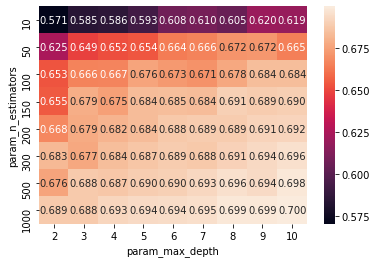

In [0]:
# plotting with heatmap
sns.heatmap(results.pivot("param_n_estimators","param_max_depth","mean_test_score"),annot=True,fmt='.3f')
plt.show()

In [0]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 1000}

<h2>Testing with test data,plotting ROC(SET-1):</h2>

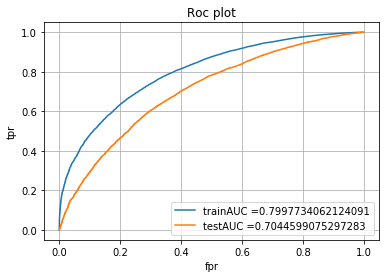

In [0]:
best_n_estimators = 1000
best_max_depth = 10
from sklearn.metrics import roc_curve,auc

bow_clf = RandomForestClassifier(max_depth =10 ,n_estimators = 1000,class_weight = 'balanced')
bow_clf.fit(X_train_bow,y_train)

y_train_pred = bow_clf.predict_proba(X_train_bow)[:,1]
y_test_pred = bow_clf.predict_proba(X_test_bow)[:,1]

train_fpr , train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainAUC ="+ str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="testAUC ="+ str(auc(test_fpr,test_tpr)) )
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Roc plot")
plt.legend()
plt.show()

In [45]:
def find_best_thresh(thresholds,fpr,tpr):
  thresh = thresholds[np.argmax(tpr*(1-fpr))]
  print("Maximum value of threshold is",np.round(thresh,3))
  return thresh

def predict_class_label(proba_scores,best_threshold):
  predicted_outputs = []
  for each in proba_scores:
    if(each > best_threshold):
      predicted_outputs.append(1)
    else:
      predicted_outputs.append(0)
  return predicted_outputs

Maximum value of threshold is 0.5
Maximum value of threshold is 0.503
train confusion matrix:


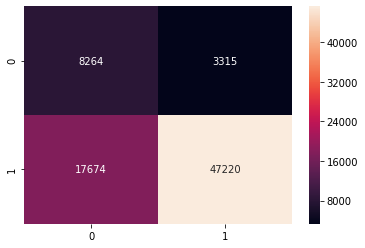

test confusion matrix:


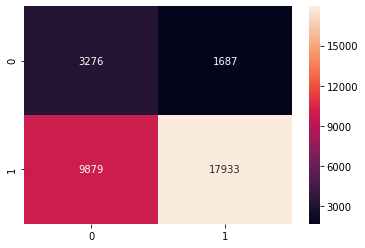

In [0]:
from sklearn.metrics import confusion_matrix

train_best_t = find_best_thresh(train_thresholds,train_fpr,train_tpr)
test_best_t = find_best_thresh(test_thresholds,test_fpr,test_tpr)
train_pred = predict_class_label(y_train_pred,train_best_t)
l = confusion_matrix(y_train,train_pred)
print("train confusion matrix:")
sns.heatmap(l,annot=True,fmt='d')
plt.show()

print("="*100)
print("test confusion matrix:")
test_pred = predict_class_label(y_test_pred,test_best_t)
k = confusion_matrix(y_test,test_pred)
sns.heatmap(k,annot=True,fmt='d')
plt.show()

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [74]:
X_train_tfidf = hstack((X_categorical_train,X_train_price_std,x_train_essay_tfidf,x_train_title_tfidf)).tocsr()
X_test_tfidf = hstack((X_categorical_test,X_test_price_std,x_test_essay_tfidf,x_test_title_tfidf)).tocsr()

print("Data matrix")
print(X_train_tfidf.shape,y_train.shape)
print(X_test_tfidf.shape,y_test.shape)

Data matrix
(76473, 63198) (76473,)
(32775, 63198) (32775,)


<h2>Hyperparameter tuning on SET-2:</h2>

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

tfidf_clf = RandomForestClassifier(class_weight='balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10] , 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(tfidf_clf, parameters, cv=3, n_jobs = -1,scoring='roc_auc',return_train_score=True)
clf.fit(X_train_tfidf , y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
max_dep =  results['param_max_depth']
n_estim = results['param_n_estimators']
results.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       0.707972      0.058032  ...          0.591925         0.003579
1       1.895789      0.054883  ...          0.651171         0.010279
2       3.379225      0.016781  ...          0.687151         0.002193
3       4.951881      0.020681  ...          0.692494         0.008365
4       6.508031      0.098814  ...          0.702899         0.006392

[5 rows x 18 columns]

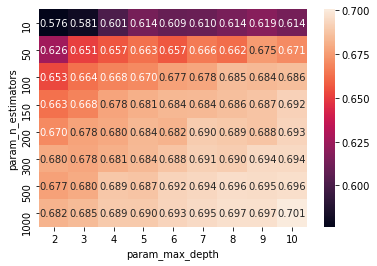

In [0]:
# plotting with heatmap
sns.heatmap(results.pivot("param_n_estimators","param_max_depth","mean_test_score"),annot=True,fmt='.3f')
plt.show()

In [0]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 1000}

<h2>Testing on test data,plotting ROC(SET-2):</h2>

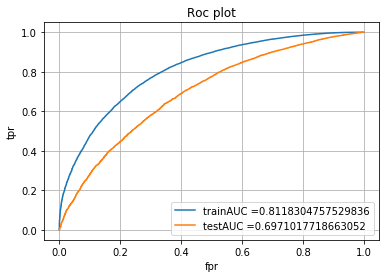

In [0]:
best_n_estimators = 1000
best_max_depth = 10
from sklearn.metrics import roc_curve,auc

tfidf_clf = RandomForestClassifier(max_depth = best_max_depth ,n_estimators = best_n_estimators ,class_weight = 'balanced')
tfidf_clf.fit(X_train_tfidf,y_train)

y_train_pred = tfidf_clf.predict_proba(X_train_tfidf)[:,1]
y_test_pred = tfidf_clf.predict_proba(X_test_tfidf)[:,1]

train_fpr , train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainAUC ="+ str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="testAUC ="+ str(auc(test_fpr,test_tpr)) )
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Roc plot")
plt.legend()
plt.show()

Maximum value of threshold is 0.503
Maximum value of threshold is 0.507
train confusion matrix:


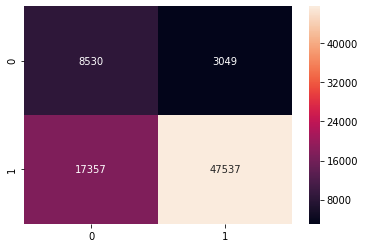

test confusion matrix:


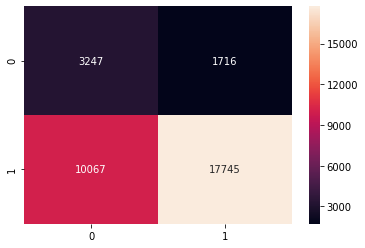

In [0]:
from sklearn.metrics import confusion_matrix

train_best_t = find_best_thresh(train_thresholds,train_fpr,train_tpr)
test_best_t = find_best_thresh(test_thresholds,test_fpr,test_tpr)
train_pred = predict_class_label(y_train_pred,train_best_t)
l = confusion_matrix(y_train,train_pred)
print("train confusion matrix:")
sns.heatmap(l,annot=True,fmt='d')
plt.show()

print("="*100)
print("test confusion matrix:")
test_pred = predict_class_label(y_test_pred,test_best_t)
k = confusion_matrix(y_test,test_pred)
sns.heatmap(k,annot=True,fmt='d')
plt.show()

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [35]:
X_train_avg = np.hstack((X_categorical_train,X_train_price_std, avg_w2v_vectors_essay_train, avg_w2v_vectors_project_title_train))
X_test_avg = np.hstack((X_categorical_test,X_test_price_std, avg_w2v_vectors_essay_test,avg_w2v_vectors_project_title_test))

print("Data matrix")
print(X_train_avg.shape,y_train.shape)
print(X_test_avg.shape,y_test.shape)

Data matrix
(76473, 611) (76473,)
(32775, 611) (32775,)


<h2>Hyperparameter tuning on SET-3:</h2>

In [38]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

avg_clf = RandomForestClassifier(class_weight='balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10] , 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(avg_clf, parameters, cv=3, n_jobs = -1,scoring='roc_auc',return_train_score=True, verbose=5)
clf.fit(X_train_avg , y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score']
max_dep =  results['param_max_depth']
n_estim = results['param_n_estimators']
results.head()

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 77.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 164.2min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.605129      0.217025         0.182322        0.007383   
1      24.347216      0.187947         0.369816        0.014749   
2      47.902508      0.560068         0.604093        0.007277   
3      71.503629      0.311816         0.833367        0.026560   
4      94.859471      0.305362         1.078353        0.012993   

  param_max_depth param_n_estimators                                 params  \
0               2                 10   {'max_depth': 2, 'n_estimators': 10}   
1               2                 50   {'max_depth': 2, 'n_estimators': 50}   
2               2                100  {'max_depth': 2, 'n_estimators': 100}   
3               2                150  {'max_depth': 2, 'n_estimators': 150}   
4               2                200  {'max_depth': 2, 'n_estimators': 200}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.624783           0.647403           0.624118         0.632101   
1           0.650008           0.653616           0.657548         0.653724   
2           0.652053           0.659609           0.666193         0.659285   
3           0.662816           0.656886           0.662033         0.660578   
4           0.663204           0.653780           0.667326         0.661437   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.010824               71            0.632978            0.660411   
1        0.003079               64            0.661765            0.675712   
2        0.005777               62            0.663817            0.678448   
3        0.002630               60            0.677666            0.674791   
4        0.005669               59            0.676717            0.671627   

   split2_train_score  mean_train_score  std_train_score  
0            0.626962          0.640117         0.014559  
1            0.664519          0.667332         0.006031  
2            0.674223          0.672163         0.006148  
3            0.670442          0.674300         0.002970  
4            0.677254          0.675199         0.002536

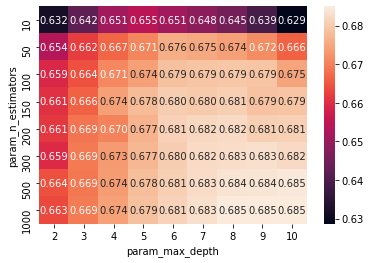

In [40]:
# plotting with heatmap
sns.heatmap(results.pivot("param_n_estimators","param_max_depth","mean_test_score"),annot=True,fmt='.3f')
plt.show()

In [41]:
clf.best_params_

{'max_depth': 8, 'n_estimators': 1000}

<h2>Testing on test data,plotting ROC(SET-3):</h2>

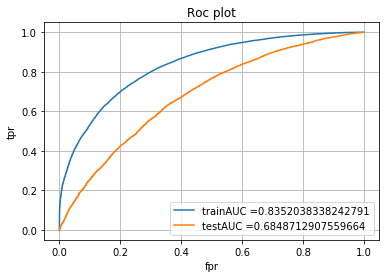

In [42]:
best_n_estimators = 1000
best_max_depth = 8
from sklearn.metrics import roc_curve,auc

avg_clf = RandomForestClassifier(max_depth = best_max_depth ,n_estimators = best_n_estimators ,class_weight = 'balanced')
avg_clf.fit(X_train_avg,y_train)

y_train_pred = avg_clf.predict_proba(X_train_avg)[:,1]
y_test_pred = avg_clf.predict_proba(X_test_avg)[:,1]

train_fpr , train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainAUC ="+ str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="testAUC ="+ str(auc(test_fpr,test_tpr)) )
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Roc plot")
plt.legend()
plt.show()

Maximum value of threshold is 0.517
Maximum value of threshold is 0.534
train confusion matrix:


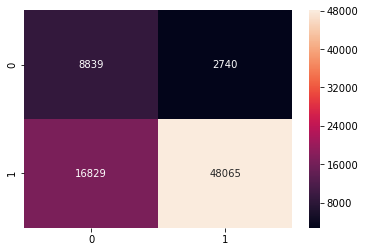

test confusion matrix:


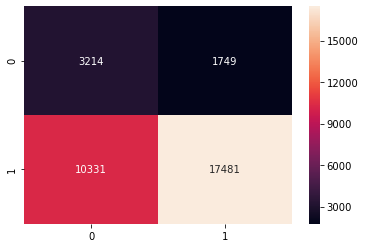

In [43]:
from sklearn.metrics import confusion_matrix

train_best_t = find_best_thresh(train_thresholds,train_fpr,train_tpr)
test_best_t = find_best_thresh(test_thresholds,test_fpr,test_tpr)
train_pred = predict_class_label(y_train_pred,train_best_t)
l = confusion_matrix(y_train,train_pred)
print("train confusion matrix:")
sns.heatmap(l,annot=True,fmt='d')
plt.show()

print("="*100)
print("test confusion matrix:")
test_pred = predict_class_label(y_test_pred,test_best_t)
k = confusion_matrix(y_test,test_pred)
sns.heatmap(k,annot=True,fmt='d')
plt.show()

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [38]:
X_train_tfidfw2v = np.hstack((X_categorical_train,X_train_price_std,tfidf_w2v_vectors_essay_train,tfidf_w2v_vectors_project_title_train))
X_test_tfidfw2v = np.hstack((X_categorical_test,X_test_price_std,tfidf_w2v_vectors_essay_test, tfidf_w2v_vectors_project_title_test))

print("Data matrix")
print(X_train_tfidfw2v.shape,y_train.shape)
print(X_test_tfidfw2v.shape,y_test.shape)

Data matrix
(76473, 611) (76473,)
(32775, 611) (32775,)


<h2>Hyperparameter tuning on SET-4:</h2>

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

tf_clf = RandomForestClassifier(class_weight='balanced')
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10] , 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(tf_clf, parameters, cv=3, n_jobs = -1,scoring='roc_auc',return_train_score=True,verbose=5)
clf.fit(X_train_tfidfw2v , y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
max_dep =  results['param_max_depth']
n_estim = results['param_n_estimators']
results.head()

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 76.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 165.2min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.463378      0.082018         0.187495        0.012753   
1      23.271067      0.108519         0.354641        0.007354   
2      46.501092      0.401751         0.604143        0.007367   
3      71.282975      1.400528         0.838498        0.026559   
4      94.971118      0.706980         1.046844        0.025519   

  param_max_depth param_n_estimators                                 params  \
0               2                 10   {'max_depth': 2, 'n_estimators': 10}   
1               2                 50   {'max_depth': 2, 'n_estimators': 50}   
2               2                100  {'max_depth': 2, 'n_estimators': 100}   
3               2                150  {'max_depth': 2, 'n_estimators': 150}   
4               2                200  {'max_depth': 2, 'n_estimators': 200}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.636868           0.640049           0.637788         0.638235   
1           0.661244           0.656596           0.664799         0.660880   
2           0.654324           0.660449           0.668255         0.661009   
3           0.667534           0.657111           0.663572         0.662739   
4           0.667607           0.659697           0.665028         0.664111   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001337               72            0.645738            0.657540   
1        0.003359               63            0.672904            0.677900   
2        0.005701               62            0.666530            0.682223   
3        0.004296               61            0.676160            0.678004   
4        0.003294               59            0.677580            0.680420   

   split2_train_score  mean_train_score  std_train_score  
0            0.639572          0.647616         0.007455  
1            0.671447          0.674084         0.002763  
2            0.677720          0.675491         0.006598  
3            0.673575          0.675913         0.001816  
4            0.673474          0.677158         0.002851

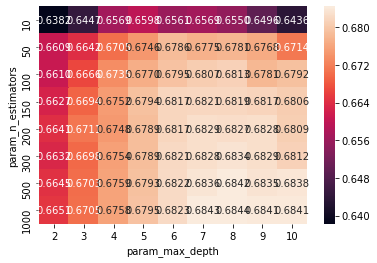

In [46]:
# plotting with heatmap
sns.heatmap(results.pivot("param_n_estimators","param_max_depth","mean_test_score"),annot=True,fmt='.4f')
plt.show()

In [47]:
clf.best_params_

{'max_depth': 8, 'n_estimators': 1000}

<h2>Testing on test data,plotting ROC(SET-4):</h2>

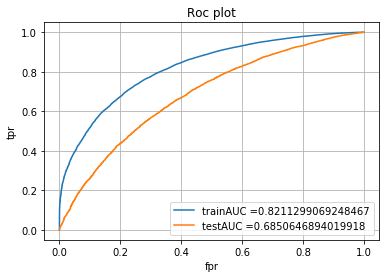

In [68]:
best_n_estimators = 1000
best_max_depth = 8
from sklearn.metrics import roc_curve,auc

tf_clf = RandomForestClassifier(max_depth = best_max_depth ,n_estimators = best_n_estimators ,class_weight = 'balanced')
tf_clf.fit(X_train_tfidfw2v,y_train)

y_train_pred = tf_clf.predict_proba(X_train_tfidfw2v)[:,1]
y_test_pred = tf_clf.predict_proba(X_test_tfidfw2v)[:,1]

train_fpr , train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainAUC ="+ str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="testAUC ="+ str(auc(test_fpr,test_tpr)) )
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Roc plot")
plt.legend()
plt.show()

Maximum value of threshold is 0.507
Maximum value of threshold is 0.519
train confusion matrix:


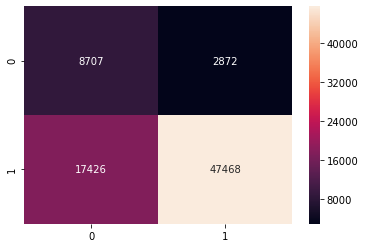

test confusion matrix:


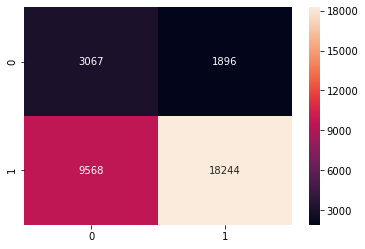

In [69]:
from sklearn.metrics import confusion_matrix

train_best_t = find_best_thresh(train_thresholds,train_fpr,train_tpr)
test_best_t = find_best_thresh(test_thresholds,test_fpr,test_tpr)
train_pred = predict_class_label(y_train_pred,train_best_t)
l = confusion_matrix(y_train,train_pred)
print("train confusion matrix:")
sns.heatmap(l,annot=True,fmt='d')
plt.show()

print("="*100)
print("test confusion matrix:")
test_pred = predict_class_label(y_test_pred,test_best_t)
k = confusion_matrix(y_test,test_pred)
sns.heatmap(k,annot=True,fmt='d')
plt.show()

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10] , 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
bow_clf = GridSearchCV(xgb, parameters, cv=3, n_jobs = -1,scoring='roc_auc',return_train_score=True,verbose=5)
bow_clf.fit(X_train_bow,y_train)

results = pd.DataFrame.from_dict(bow_clf.cv_results_)

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
max_dep =  results['param_max_depth']
n_estim = results['param_n_estimators']
results.head()

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 117.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 252.5min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.193202      0.070264         2.171993        0.038131   
1      40.356100      0.511163         2.182788        0.029459   
2      76.228125      0.529329         2.213520        0.044805   
3     110.156688      0.712868         2.223933        0.014729   
4     145.991550      1.549538         2.255174        0.041011   

  param_max_depth param_n_estimators                                 params  \
0               2                 10   {'max_depth': 2, 'n_estimators': 10}   
1               2                 50   {'max_depth': 2, 'n_estimators': 50}   
2               2                100  {'max_depth': 2, 'n_estimators': 100}   
3               2                150  {'max_depth': 2, 'n_estimators': 150}   
4               2                200  {'max_depth': 2, 'n_estimators': 200}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.628011           0.631297           0.625388         0.628232   
1           0.673590           0.667888           0.671603         0.671027   
2           0.693184           0.690423           0.691467         0.691691   
3           0.704651           0.702018           0.704158         0.703609   
4           0.711043           0.709361           0.711646         0.710683   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.002417               72            0.633304            0.640342   
1        0.002364               63            0.684456            0.684292   
2        0.001139               60            0.711702            0.712509   
3        0.001143               57            0.728665            0.728587   
4        0.000967               51            0.740323            0.740399   

   split2_train_score  mean_train_score  std_train_score  
0            0.636440          0.636696         0.002879  
1            0.683763          0.684170         0.000296  
2            0.709259          0.711157         0.001382  
3            0.726665          0.727972         0.000925  
4            0.738373          0.739699         0.000938

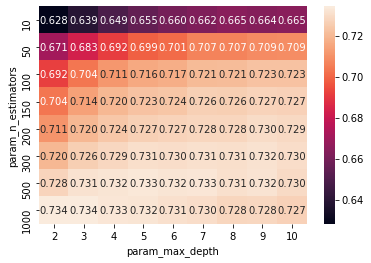

In [66]:
# plotting with heatmap
sns.heatmap(results.pivot("param_n_estimators","param_max_depth","mean_test_score"),annot=True,fmt='.3f')
plt.show()

In [55]:
bow_clf.best_params_

{'max_depth': 3, 'n_estimators': 1000}

<h2> Testing with test data,plotting ROC(SET-1):</h2>

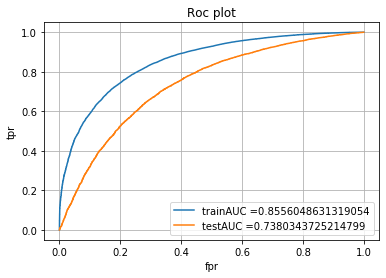

In [70]:
best_n_estimators = 1000
best_max_depth = 3
from sklearn.metrics import roc_curve,auc

bow_clf = XGBClassifier(max_depth = best_max_depth ,n_estimators = best_n_estimators)
bow_clf.fit(X_train_bow,y_train)

y_train_pred = bow_clf.predict_proba(X_train_bow)[:,1]
y_test_pred = bow_clf.predict_proba(X_test_bow)[:,1]

train_fpr , train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainAUC ="+ str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="testAUC ="+ str(auc(test_fpr,test_tpr)) )
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Roc plot")
plt.legend()
plt.show()

Maximum value of threshold is 0.816
Maximum value of threshold is 0.837
train confusion matrix:


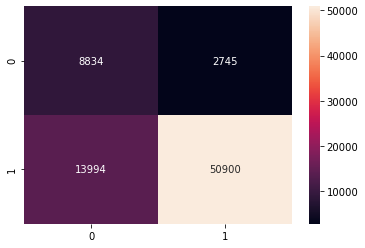

test confusion matrix:


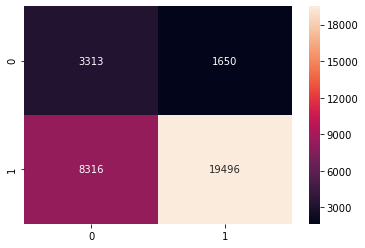

In [71]:
from sklearn.metrics import confusion_matrix

train_best_t = find_best_thresh(train_thresholds,train_fpr,train_tpr)
test_best_t = find_best_thresh(test_thresholds,test_fpr,test_tpr)
train_pred = predict_class_label(y_train_pred,train_best_t)
l = confusion_matrix(y_train,train_pred)
print("train confusion matrix:")
sns.heatmap(l,annot=True,fmt='d')
plt.show()

print("="*100)
print("test confusion matrix:")
test_pred = predict_class_label(y_test_pred,test_best_t)
k = confusion_matrix(y_test,test_pred)
sns.heatmap(k,annot=True,fmt='d')
plt.show()

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [75]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10] , 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
clf = GridSearchCV(xgb, parameters, cv=3, n_jobs = -1,scoring='roc_auc',return_train_score=True,verbose=5)
clf.fit(X_train_tfidf,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
max_dep =  results['param_max_depth']
n_estim = results['param_n_estimators']
results.head()

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 55.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 255.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 556.5min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      21.058125      0.064418         2.109673        0.025709   
1      80.842128      0.757604         2.203259        0.033515   
2     154.944620      1.266023         2.224555        0.014744   
3     225.532657      1.565461         2.229231        0.026547   
4     301.653980      1.117616         2.307312        0.038976   

  param_max_depth param_n_estimators                                 params  \
0               2                 10   {'max_depth': 2, 'n_estimators': 10}   
1               2                 50   {'max_depth': 2, 'n_estimators': 50}   
2               2                100  {'max_depth': 2, 'n_estimators': 100}   
3               2                150  {'max_depth': 2, 'n_estimators': 150}   
4               2                200  {'max_depth': 2, 'n_estimators': 200}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.639447           0.634643           0.634723         0.636271   
1           0.679857           0.670726           0.677501         0.676028   
2           0.697878           0.690917           0.698905         0.695900   
3           0.707266           0.702407           0.709786         0.706487   
4           0.713215           0.709538           0.715580         0.712777   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.002246               72            0.642616            0.644466   
1        0.003871               63            0.693795            0.693941   
2        0.003549               60            0.721569            0.723110   
3        0.003063               55            0.740025            0.740989   
4        0.002486               50            0.753133            0.754175   

   split2_train_score  mean_train_score  std_train_score  
0            0.644930          0.644004         0.001000  
1            0.688955          0.692230         0.002317  
2            0.718908          0.721196         0.001735  
3            0.737279          0.739431         0.001572  
4            0.751232          0.752847         0.001218

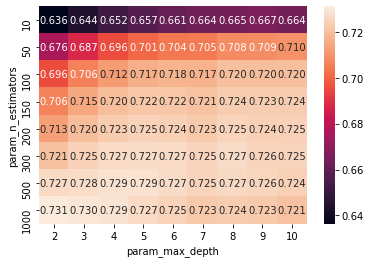

In [76]:
# plotting with heatmap
sns.heatmap(results.pivot("param_n_estimators","param_max_depth","mean_test_score"),annot=True,fmt='.3f')
plt.show()

In [77]:
clf.best_params_

{'max_depth': 2, 'n_estimators': 1000}

<h2>Testing with test data,plotting ROC(SET-2):</h2>

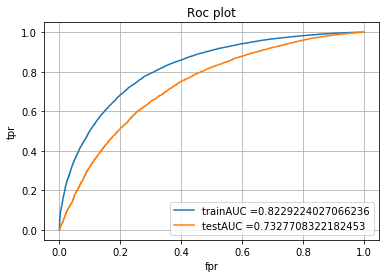

In [79]:
best_n_estimators = clf.best_params_['n_estimators']
best_max_depth = clf.best_params_['max_depth']

from sklearn.metrics import roc_curve,auc

tfidf_clf = XGBClassifier(max_depth = best_max_depth ,n_estimators = best_n_estimators)
tfidf_clf.fit(X_train_tfidf,y_train)

y_train_pred = tfidf_clf.predict_proba(X_train_tfidf)[:,1]
y_test_pred = tfidf_clf.predict_proba(X_test_tfidf)[:,1]

train_fpr , train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainAUC ="+ str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="testAUC ="+ str(auc(test_fpr,test_tpr)) )
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Roc plot")
plt.legend()
plt.show()

Maximum value of threshold is 0.82
Maximum value of threshold is 0.843
train confusion matrix:


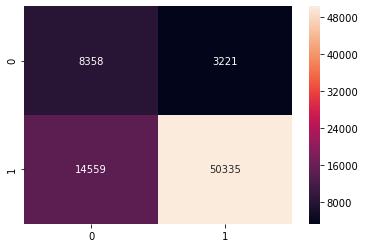

test confusion matrix:


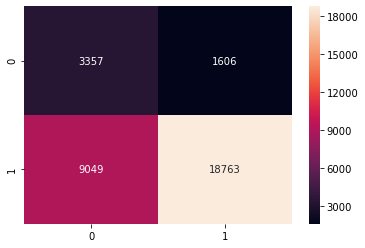

In [80]:
from sklearn.metrics import confusion_matrix

train_best_t = find_best_thresh(train_thresholds,train_fpr,train_tpr)
test_best_t = find_best_thresh(test_thresholds,test_fpr,test_tpr)
train_pred = predict_class_label(y_train_pred,train_best_t)
l = confusion_matrix(y_train,train_pred)
print("train confusion matrix:")
sns.heatmap(l,annot=True,fmt='d')
plt.show()

print("="*100)
print("test confusion matrix:")
test_pred = predict_class_label(y_test_pred,test_best_t)
k = confusion_matrix(y_test,test_pred)
sns.heatmap(k,annot=True,fmt='d')
plt.show()

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [81]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10] , 'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000]}
avg_grid_clf = GridSearchCV(xgb, parameters, cv=3, n_jobs = -1,scoring='roc_auc',return_train_score=True,verbose=5)
avg_grid_clf.fit(X_train_avg,y_train)

results = pd.DataFrame.from_dict(avg_grid_clf.cv_results_)

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
max_dep =  results['param_max_depth']
n_estim = results['param_n_estimators']
results.head()

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 137.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 650.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 2871.3min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      49.715748      0.352242         0.896151        0.019275   
1     207.171541      0.207420         1.010414        0.007358   
2     394.029898      3.793724         1.005201        0.019492   
3     582.207977      4.020309         1.062510        0.012760   
4     776.955687      4.623519         1.078298        0.025313   

  param_max_depth param_n_estimators                                 params  \
0               2                 10   {'max_depth': 2, 'n_estimators': 10}   
1               2                 50   {'max_depth': 2, 'n_estimators': 50}   
2               2                100  {'max_depth': 2, 'n_estimators': 100}   
3               2                150  {'max_depth': 2, 'n_estimators': 150}   
4               2                200  {'max_depth': 2, 'n_estimators': 200}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.648902           0.641268           0.644832         0.645001   
1           0.685349           0.675988           0.679925         0.680421   
2           0.695109           0.691320           0.693699         0.693376   
3           0.701704           0.697028           0.699108         0.699280   
4           0.705451           0.700292           0.701335         0.702359   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.003119               72            0.657033            0.662021   
1        0.003838               63            0.699928            0.699424   
2        0.001564               38            0.720167            0.721960   
3        0.001913               21            0.734771            0.736308   
4        0.002227               12            0.745123            0.747053   

   split2_train_score  mean_train_score  std_train_score  
0            0.660008          0.659687         0.002049  
1            0.699997          0.699783         0.000255  
2            0.721535          0.721221         0.000765  
3            0.735466          0.735515         0.000628  
4            0.746128          0.746101         0.000788

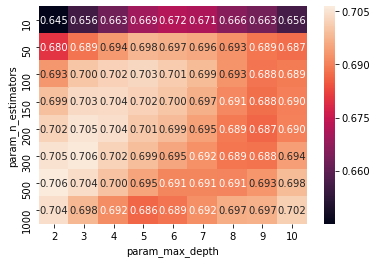

In [82]:
# plotting with heatmap
sns.heatmap(results.pivot("param_n_estimators","param_max_depth","mean_test_score"),annot=True,fmt='.3f')
plt.show()

In [83]:
avg_grid_clf.best_params_

{'max_depth': 2, 'n_estimators': 500}

<h2>Testing on test data,plotting ROC(SET-3):</h2>

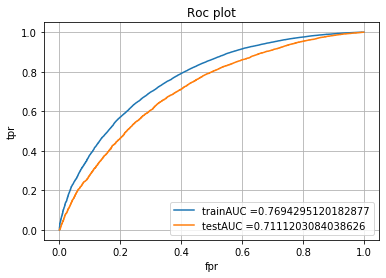

In [84]:
best_n_estimators = avg_grid_clf.best_params_['n_estimators']
best_max_depth = avg_grid_clf.best_params_['max_depth']

from sklearn.metrics import roc_curve,auc

avg_clf = XGBClassifier(max_depth = best_max_depth ,n_estimators = best_n_estimators)
avg_clf.fit(X_train_avg,y_train)

y_train_pred = avg_clf.predict_proba(X_train_avg)[:,1]
y_test_pred = avg_clf.predict_proba(X_test_avg)[:,1]

train_fpr , train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainAUC ="+ str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="testAUC ="+ str(auc(test_fpr,test_tpr)) )
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Roc plot")
plt.legend()
plt.show()

Maximum value of threshold is 0.842
Maximum value of threshold is 0.844
train confusion matrix:


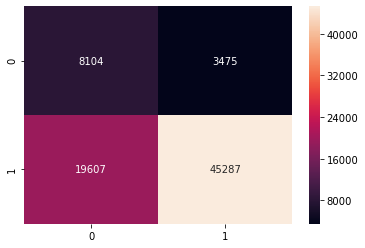

test confusion matrix:


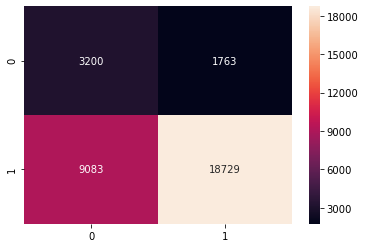

In [85]:
from sklearn.metrics import confusion_matrix

train_best_t = find_best_thresh(train_thresholds,train_fpr,train_tpr)
test_best_t = find_best_thresh(test_thresholds,test_fpr,test_tpr)
train_pred = predict_class_label(y_train_pred,train_best_t)
l = confusion_matrix(y_train,train_pred)
print("train confusion matrix:")
sns.heatmap(l,annot=True,fmt='d')
plt.show()

print("="*100)
print("test confusion matrix:")
test_pred = predict_class_label(y_test_pred,test_best_t)
k = confusion_matrix(y_test,test_pred)
sns.heatmap(k,annot=True,fmt='d')
plt.show()

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb = XGBClassifier()
parameters = {'max_depth': [2, 3, 4, 5] , 'n_estimators': [300,500,1000]}
tfw2v_grid_clf = GridSearchCV(xgb, parameters, cv=3, n_jobs = -1,scoring='roc_auc',return_train_score=True,verbose=5)
tfw2v_grid_clf.fit(X_train_tfidfw2v,y_train)

results = pd.DataFrame.from_dict(tfw2v_grid_clf.cv_results_)

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
max_dep =  results['param_max_depth']
n_estim = results['param_n_estimators']
results.head()

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 205.1min
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed: 403.5min remaining: 97.4min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 485.9min finished


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0    1156.577558      7.991620         1.062937        0.046089   
1    1739.422578      8.435194         1.093875        0.123130   
2    3101.620345    474.343714         1.364658        0.217617   
3    1654.274793     15.381109         1.239504        0.048299   
4    2720.839916     27.847028         1.442857        0.051476   

  param_max_depth param_n_estimators                                  params  \
0               2                300   {'max_depth': 2, 'n_estimators': 300}   
1               2                500   {'max_depth': 2, 'n_estimators': 500}   
2               2               1000  {'max_depth': 2, 'n_estimators': 1000}   
3               3                300   {'max_depth': 3, 'n_estimators': 300}   
4               3                500   {'max_depth': 3, 'n_estimators': 500}   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.700564           0.708170           0.711477         0.706737   
1           0.701500           0.707971           0.712114         0.707195   
2           0.700522           0.705134           0.709375         0.705010   
3           0.703510           0.707322           0.711362         0.707398   
4           0.701453           0.705526           0.710501         0.705827   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.004569                3            0.765263            0.763490   
1        0.004368                2            0.792027            0.789569   
2        0.003616                6            0.838420            0.837431   
3        0.003206                1            0.826237            0.825546   
4        0.003700                4            0.870393            0.870490   

   split2_train_score  mean_train_score  std_train_score  
0            0.760365          0.763039         0.002025  
1            0.787703          0.789766         0.001771  
2            0.835029          0.836960         0.001424  
3            0.822926          0.824903         0.001426  
4            0.868079          0.869654         0.001114

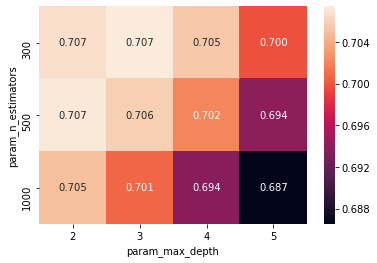

In [41]:
# plotting with heatmap
sns.heatmap(results.pivot("param_n_estimators","param_max_depth","mean_test_score"),annot=True,fmt='.3f')
plt.show()

In [42]:
tfw2v_grid_clf.best_params_

{'max_depth': 3, 'n_estimators': 300}

<h2>Testing on testdata,plotting ROC(SET-4):</h2>

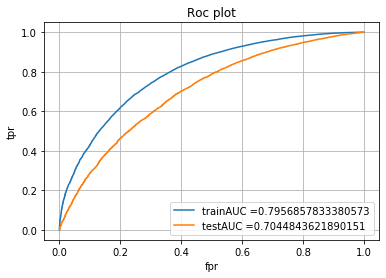

In [43]:
best_n_estimators = tfw2v_grid_clf.best_params_['n_estimators']
best_max_depth = tfw2v_grid_clf.best_params_['max_depth']

from sklearn.metrics import roc_curve,auc

tfw2v_clf = XGBClassifier(max_depth = best_max_depth ,n_estimators = best_n_estimators)
tfw2v_clf.fit(X_train_tfidfw2v,y_train)

y_train_pred = tfw2v_clf.predict_proba(X_train_tfidfw2v)[:,1]
y_test_pred = tfw2v_clf.predict_proba(X_test_tfidfw2v)[:,1]

train_fpr , train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_pred)

plt.plot(train_fpr, train_tpr, label="trainAUC ="+ str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr, test_tpr, label="testAUC ="+ str(auc(test_fpr,test_tpr)) )
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Roc plot")
plt.legend()
plt.show()

Maximum value of threshold is 0.829
Maximum value of threshold is 0.838
train confusion matrix:


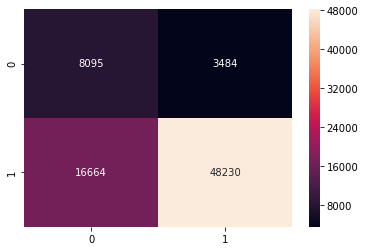

test confusion matrix:


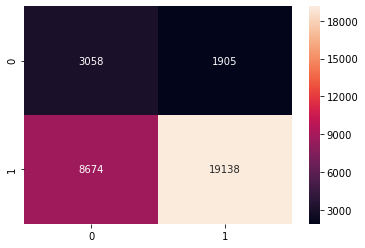

In [46]:
from sklearn.metrics import confusion_matrix

train_best_t = find_best_thresh(train_thresholds,train_fpr,train_tpr)
test_best_t = find_best_thresh(test_thresholds,test_fpr,test_tpr)
train_pred = predict_class_label(y_train_pred,train_best_t)
l = confusion_matrix(y_train,train_pred)
print("train confusion matrix:")
sns.heatmap(l,annot=True,fmt='d')
plt.show()

print("="*100)
print("test confusion matrix:")
test_pred = predict_class_label(y_test_pred,test_best_t)
k = confusion_matrix(y_test,test_pred)
sns.heatmap(k,annot=True,fmt='d')
plt.show()

<h1>3. Conclusion</h1>

In [56]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
tab = PrettyTable()
tab.field_names = ["Vectorizer","Model","Hyperparameter","AUC"]
tab.add_row(["Bow","Random Forest","Max-depth:10\nn_estimators:1000","0.70"])
tab.add_row([" "," "," "," "])
tab.add_row(["Tfidf","Random Forest","Max-depth:10\nn_estimators:1000","0.69"])
tab.add_row([" "," "," "," "])
tab.add_row(["AvgW2v","Random Forest","Max-depth:8\nn_estimators:1000","0.68"])
tab.add_row([" "," "," "," "])
tab.add_row(["TfidfW2v","Random Forest","Max-depth:8\nn_estimators:1000","0.68"])
tab.add_row([" "," "," "," "])
tab.add_row([" "," "," "," "])
tab.add_row(["Bow","GBDT","Max-depth:3\nn_estimators:1000","0.73"])
tab.add_row([" "," "," "," "])
tab.add_row(["Tfidf","GBDT","Max-depth:2\nn_estimators:1000","0.73"])
tab.add_row([" "," "," "," "])
tab.add_row(["AvgW2v","GBDT","Max-depth:2\nn_estimators:500","0.71"])
tab.add_row([" "," "," "," "])
tab.add_row(["TfidfW2v","GBDT","Max-depth:3\nn_estimators:300","0.70"])
print(tab)

+------------+---------------+-------------------+------+
| Vectorizer |     Model     |   Hyperparameter  | AUC  |
+------------+---------------+-------------------+------+
|    Bow     | Random Forest |    Max-depth:10   | 0.70 |
|            |               | n_estimators:1000 |      |
|            |               |                   |      |
|   Tfidf    | Random Forest |    Max-depth:10   | 0.69 |
|            |               | n_estimators:1000 |      |
|            |               |                   |      |
|   AvgW2v   | Random Forest |    Max-depth:8    | 0.68 |
|            |               | n_estimators:1000 |      |
|            |               |                   |      |
|  TfidfW2v  | Random Forest |    Max-depth:8    | 0.68 |
|            |               | n_estimators:1000 |      |
|            |               |                   |      |
|            |               |                   |      |
|    Bow     |      GBDT     |    Max-depth:3    | 0.73 |
|            |